In [1]:
%load_ext autoreload
%load_ext line_profiler

In [2]:
%autoreload 

import sys
sys.path.append('../../..')
import pickle

import numpy as np
from tqdm import tqdm_notebook as tqdm

import matplotlib
matplotlib.rc_file('../../matplotlibrc')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import matplotlib.colors as colors
%matplotlib inline

import darkhistory.physics as phys
import main
import config


Bad key text.latex.preview in file ../../matplotlibrc, line 10 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
%autoreload 

mDM = 22

params_list = [{'pri':'phot', 'DM_process':'decay', 
                'mDM':mDM, 'inj_param':1e22
            }]

options_dict = {
    'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':4, 'cross_check':False, 'elec_method':'old',
    #'reion_switch':True, 'reion_method':'Puchwein', 'heat_switch':True,
    'reion_switch':False, 'reion_method':'Puchwein', 'heat_switch':False,
    'coarsen_factor':16, 'distort':False, 'fexc_switch': False, 'backreaction':False,
    'reprocess_distortion':False, 'nmax':10, 'rtol':1e-6, 'use_tqdm':True, 'tqdm_jupyter':True, 'iterations':1
}

output_dir = '/scratch/gpfs/hongwanl/DarkHistory/scratch/'

main.embarrassingly_parallel_evolve(
    params_list, 0, options_dict, output_dir, 'max_CMB_no_BR_no_distort_TLA_old'
)

****** Loading transfer functions... ******
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******


  0%|          | 0/414.0 [00:00<?, ?it/s]

Successfully produced file:  /scratch/gpfs/hongwanl/DarkHistory/scratch/phot_decay_log10mDM_1.3424_log10param_22.0000_max_CMB_no_BR_no_distort_TLA_old_ind_0.p


In [4]:
%autoreload 

mDM = 22

params_list = [{'pri':'phot', 'DM_process':'decay', 
                'mDM':mDM, 'inj_param':1e22
            }]

options_dict = {
    'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':4, 'cross_check':False, 'elec_method':'eff',
    #'reion_switch':True, 'reion_method':'Puchwein', 'heat_switch':True,
    'reion_switch':False, 'reion_method':'Puchwein', 'heat_switch':False,
    'coarsen_factor':16, 'distort':True, 'fexc_switch': True, 'backreaction':False,
    'reprocess_distortion':True, 'nmax':10, 'rtol':1e-6, 'use_tqdm':True, 'tqdm_jupyter':True, 'iterations':1
}

output_dir = '/scratch/gpfs/hongwanl/DarkHistory/scratch/'

main.embarrassingly_parallel_evolve(
    params_list, 0, options_dict, output_dir, 'max_CMB_no_BR_no_distort_TLA_eff'
)

  0%|          | 0/414.0 [00:00<?, ?it/s]

/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


3000 0.9999999993087476 0.0011240972653265258 0.0 0.004621600361020217
2952.381960165853 0.9999999990787061 0.0006893390167716096 0.0 0.005516723888971065
2905.5197462375904 0.9999999987659293 0.0008771322204529526 0.0 0.006608426868264905
2859.4013612325116 0.9999999983385112 0.0009331798380610935 0.0 0.007944166788364626
2814.014998592186 0.9999999977514318 0.0008423021079701787 0.0 0.009583679097895259
2769.3490391599075 0.9999999969408396 0.0009406082193125536 0.0 0.011602278579964986
2725.3920482061185 0.9999999958156993 0.0009514691052511157 0.0 0.014095038297020634
2682.1327725010715 0.9999999942455281 0.0009391432471892149 0.0 0.01718203674424068
2639.5601374339312 0.9999999920422903 0.0009874411001800862 0.0 0.021014895038019565
2597.663244177615 0.9999999889335209 0.0009865273798038132 0.0 0.025784803704786197
2556.4313668986338 0.9999999845222111 0.001004867661989858 0.0 0.031732168923297555
2515.853950011222 0.9999999782265915 0.0010358213776292004 0.0 0.039157850016496076


In [7]:
# full_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/log10mDM_4.0000_phot_decay_log10param_24.6021_max_CMB_nmax_200_Puchwein_ind_0.p', 'rb'))


old_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/phot_decay_log10mDM_1.3424_log10param_22.0000_max_CMB_no_BR_no_distort_TLA_old_ind_0.p', 'rb'))


new_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/phot_decay_log10mDM_1.3424_log10param_22.0000_max_CMB_no_BR_no_distort_TLA_eff_ind_0.p', 'rb'))

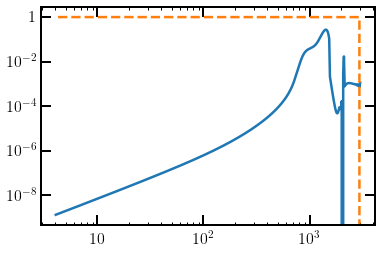

In [10]:
plt.figure()

plt.loglog()

# plt.xscale('log')

rs_vec = old_data['data']['rs']
f_ion_vec = old_data['data']['f']['H ion']
f_heat_vec = old_data['data']['f']['heat']
f_exc_vec = old_data['data']['f']['Lya']
f_cont_vec = old_data['data']['f']['cont']

rs_vec_new = new_data['data']['rs']
f_ion_vec_new = new_data['data']['f']['H ion']
f_heat_vec_new = new_data['data']['f']['heat']
f_exc_vec_new = new_data['data']['f']['Lya']
f_cont_vec_new = new_data['data']['f']['cont']



plt.plot(rs_vec, f_exc_vec_new)
plt.plot(rs_vec, f_exc_vec, '--')
# plt.plot(rs_vec, f_exc_vec)
# plt.plot(rs_vec, f_exc_std, '--')
# plt.plot(rs_vec, f_cont_vec)
# plt.plot(rs_vec, f_cont_std, '--')

# plt.axis([4, 20, 1e-4, 1e-3])

# plt.figure()

# plt.loglog()

# plt.plot(rs_vec, f_ion_vec_new / f_ion_vec)
# plt.plot(rs_vec, f_heat_vec_new / f_heat_vec)
# plt.plot(rs_vec, f_exc_vec_new / f_exc_vec)
# plt.plot(rs_vec, f_cont_vec_new / f_cont_vec)

In [ ]:
old_data['data']['f'].keys()

dict_keys(['H ion', 'He ion', 'Lya', 'heat', 'cont', 'err'])

In [ ]:
phys.nH

1.8967288219353933e-07